In [42]:
import numpy as np
from numpy import cos, sin, pi

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import sympy as sp

In [26]:
# list of DH parameters
# Structure is d, theta, a, alpha in each row

# These parameters are based on the Sixi2 from Marginally Clever

# The theta angles are also referred to as qi

DOF = 6

q1, q2, q3, q4, q5, q6 = sp.symbols('q1 q2 q3 q4 q5 q6')

spi = sp.pi
# Define DH table

DH_params = []

DH_params.append([19.7452, q1, 0, -spi/2])
DH_params.append([0, q2, 35.796, 0])
DH_params.append([0, q3, 6.4259, -spi/2])
DH_params.append([38.705, q4, 0, spi/2])
DH_params.append([0, q5, 0, -spi/2])
DH_params.append([3.795, q6, 0, 0])
DH_params.append([2.75, 0, 0, 0])

DH_params

[[19.7452, q1, 0, -pi/2],
 [0, q2, 35.796, 0],
 [0, q3, 6.4259, -pi/2],
 [38.705, q4, 0, pi/2],
 [0, q5, 0, -pi/2],
 [3.795, q6, 0, 0],
 [2.75, 0, 0, 0]]

In [27]:
# Using the combined DH matrix
def DH_trans_matrix(params):
    
    d, theta, a, alpha = (params[0], params[1], params[2], params[3])
    
    mat = sp.Matrix([[sp.cos(theta), -1*sp.sin(theta)*sp.cos(alpha), sp.sin(theta)*sp.sin(alpha),    a*sp.cos(theta)],
                    [sp.sin(theta), sp.cos(theta)*sp.cos(alpha),    -1*sp.cos(theta)*sp.sin(alpha), a*sp.sin(theta)],
                    [0,             sp.sin(alpha),                  sp.cos(alpha),                  d],
                    [0,             0,                              0,                              1]])
    
    return mat

In [37]:
transforms = []

transforms.append(sp.eye(4)) #Assuming the first first joint is at the origin

for el in DH_params:
    
    print(el)
    
    transforms.append(DH_trans_matrix(el))
    
transforms
    


[19.7452, q1, 0, -pi/2]
[0, q2, 35.796, 0]
[0, q3, 6.4259, -pi/2]
[38.705, q4, 0, pi/2]
[0, q5, 0, -pi/2]
[3.795, q6, 0, 0]
[2.75, 0, 0, 0]


[Matrix([
 [1, 0, 0, 0],
 [0, 1, 0, 0],
 [0, 0, 1, 0],
 [0, 0, 0, 1]]),
 Matrix([
 [cos(q1),  0, -sin(q1),       0],
 [sin(q1),  0,  cos(q1),       0],
 [      0, -1,        0, 19.7452],
 [      0,  0,        0,       1]]),
 Matrix([
 [cos(q2), -sin(q2), 0, 35.796*cos(q2)],
 [sin(q2),  cos(q2), 0, 35.796*sin(q2)],
 [      0,        0, 1,              0],
 [      0,        0, 0,              1]]),
 Matrix([
 [cos(q3),  0, -sin(q3), 6.4259*cos(q3)],
 [sin(q3),  0,  cos(q3), 6.4259*sin(q3)],
 [      0, -1,        0,              0],
 [      0,  0,        0,              1]]),
 Matrix([
 [cos(q4), 0,  sin(q4),      0],
 [sin(q4), 0, -cos(q4),      0],
 [      0, 1,        0, 38.705],
 [      0, 0,        0,      1]]),
 Matrix([
 [cos(q5),  0, -sin(q5), 0],
 [sin(q5),  0,  cos(q5), 0],
 [      0, -1,        0, 0],
 [      0,  0,        0, 1]]),
 Matrix([
 [cos(q6), -sin(q6), 0,     0],
 [sin(q6),  cos(q6), 0,     0],
 [      0,        0, 1, 3.795],
 [      0,        0, 0,     1]]),
 Matrix(

In [39]:
# To get the jacobain we can use the cross product method since we have all of the transformations

# Get the total transformation to the end effector
trans_EF = transforms[0]

for mat in transforms[1:]:
    
    trans_EF = trans_EF * mat
    
pos_EF = trans_EF[0:3,3]
    
J = sp.zeros(6, DOF)

for joint in range(DOF):
    
    trans_joint = transforms[0]
    
    for mat in transforms[1:joint+1]:
        
        trans_joint = trans_joint*mat
        
    z_axis = trans_joint[0:3,2]
    
    pos_joint = trans_joint[0:3,3]
    
    Jv = z_axis.cross(pos_EF - pos_joint)
    
    Jw = z_axis
    
    J[0:3,joint] = Jv
    J[3:6,joint] = Jw
    
J = sp.simplify(J)
J

Matrix([
[ 6.545*sin(q1)*sin(q5)*cos(q4)*cos(q2 + q3) + 6.545*sin(q1)*sin(q2 + q3)*cos(q5) + 38.705*sin(q1)*sin(q2 + q3) - 35.796*sin(q1)*cos(q2) - 6.4259*sin(q1)*cos(q2 + q3) - 6.545*sin(q4)*sin(q5)*cos(q1), -(35.796*sin(q2) - 6.545*sin(q5)*sin(q2 + q3)*cos(q4) + 6.4259*sin(q2 + q3) + 6.545*cos(q5)*cos(q2 + q3) + 38.705*cos(q2 + q3))*cos(q1), (6.545*sin(q5)*sin(q2 + q3)*cos(q4) - 6.4259*sin(q2 + q3) - 6.545*cos(q5)*cos(q2 + q3) - 38.705*cos(q2 + q3))*cos(q1), 6.545*(-sin(q1)*cos(q4) + sin(q4)*cos(q1)*cos(q2 + q3))*sin(q5), -6.545*sin(q1)*sin(q4)*cos(q5) + 6.545*sin(q5)*sin(q2 + q3)*cos(q1) - 6.545*cos(q1)*cos(q4)*cos(q5)*cos(q2 + q3),                                                                                        0],
[-6.545*sin(q1)*sin(q4)*sin(q5) - 6.545*sin(q5)*cos(q1)*cos(q4)*cos(q2 + q3) - 6.545*sin(q2 + q3)*cos(q1)*cos(q5) - 38.705*sin(q2 + q3)*cos(q1) + 35.796*cos(q1)*cos(q2) + 6.4259*cos(q1)*cos(q2 + q3), -(35.796*sin(q2) - 6.545*sin(q5)*sin(q2 + q3)*cos(q4) + 6.4259*si

In [ ]:
# We can implement this or just do the cross products in real time.

In [130]:
def jacobian(joints):
    
    # Convert to list if it's an ndarray
    if (isinstance(joints, np.ndarray)):
        joints = joints.flatten().tolist()
    
    J_l = J
    
    J_l = J_l.subs(q1, joints[0])
    J_l = J_l.subs(q2, joints[1])
    J_l = J_l.subs(q3, joints[2])
    J_l = J_l.subs(q4, joints[3])
    J_l = J_l.subs(q5, joints[4])
    J_l = J_l.subs(q6, joints[5])
    
    return J_l

In [131]:
joints = [0, 0, 0, 0, 0, 0]

jacobian(joints)

Matrix([
[      0,   -45.25,  -45.25,  0, -6.545,  0],
[42.2219,        0,       0,  0,      0,  0],
[      0, -42.2219, -6.4259,  0,      0,  0],
[      0,        0,       0,  0,      0,  0],
[      0,        1,       1,  0,      1,  0],
[      1,        0,       0, -1,      0, -1]])

In [141]:
def plot_pose(joints):
    
    # Convert to list if it's an ndarray
    if (isinstance(joints, np.ndarray)):
        joints = joints.flatten().tolist()
    
    pos_EF = trans_EF[0:3,3]
    
    pos_EF = pos_EF.subs(q1, joints[0])
    pos_EF = pos_EF.subs(q2, joints[1])
    pos_EF = pos_EF.subs(q3, joints[2])
    pos_EF = pos_EF.subs(q4, joints[3])
    pos_EF = pos_EF.subs(q5, joints[4])
    pos_EF = pos_EF.subs(q6, joints[5])
    
    xs = []
    ys = []
    zs = []
    
    J = sp.zeros(6, DOF)

    for joint in range(DOF):

        trans_joint = transforms[0]

        for mat in transforms[1:joint+1]:

            trans_joint = trans_joint*mat

        pos_joint = trans_joint[0:3,3]
        
        pos_joint = pos_joint.subs(q1, joints[0])
        pos_joint = pos_joint.subs(q2, joints[1])
        pos_joint = pos_joint.subs(q3, joints[2])
        pos_joint = pos_joint.subs(q4, joints[3])
        pos_joint = pos_joint.subs(q5, joints[4])
        pos_joint = pos_joint.subs(q6, joints[5])
        
        xs.append(pos_joint[0])
        ys.append(pos_joint[1])
        zs.append(pos_joint[2])
        
    xs.append(pos_EF[0])
    ys.append(pos_EF[1])
    zs.append(pos_EF[2])
            
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.set_xlim3d(-60,60)
    ax.set_ylim3d(-60,60)
    ax.set_zlim3d(0, 120)
    
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    ax.plot(xs, ys, zs)

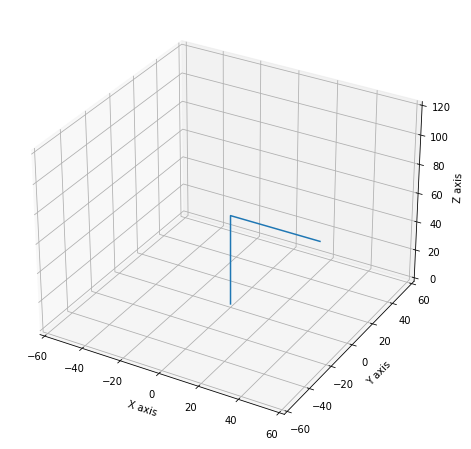

In [249]:
# This is just for testing the robot plotting mechanism

joints = [0, -pi/2, 0, pi/2, 0, 0]

plot_pose(joints)

In [285]:
def trans_EF_eval(joints):
    
    # Convert to list if it's an ndarray
    if (isinstance(joints, np.ndarray)):
        joints = joints.flatten().tolist()
    
    trans_EF_cur = trans_EF
    
    trans_EF_cur = trans_EF_cur.subs(q1, joints[0])
    trans_EF_cur = trans_EF_cur.subs(q2, joints[1])
    trans_EF_cur = trans_EF_cur.subs(q3, joints[2])
    trans_EF_cur = trans_EF_cur.subs(q4, joints[3])
    trans_EF_cur = trans_EF_cur.subs(q5, joints[4])
    trans_EF_cur = trans_EF_cur.subs(q6, joints[5])
    
    return trans_EF_cur

# joints_init is the current joint values for the robot
# target is the desired transformation matrix at the end effector
# This is currently super slow since it's using all symbolic math
def i_kine(joints_init, target, error_trace=False):
    
    joints = joints_init
    
    xr_desired = target[0:3,0:3]
    xt_desired = target[0:3,3]
    
    x_dot_prev = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])
        
    e_trace = []
    
    iters = 0;
    
    while(1):
        
        jac = jacobian(joints)
        
        jac = np.array(jac).astype(np.float64)
        
        trans_EF_cur = trans_EF_eval(joints)
                
        trans_EF_cur = np.array(trans_EF_cur).astype(np.float64)
        
        
        xr_cur = trans_EF_cur[0:3,0:3]
        xt_cur = trans_EF_cur[0:3,3]
                
        xt_dot = xt_desired - xt_cur
        
        #print(xr_cur)
        #print(np.linalg.norm(xr_cur))
        
        # Find error rotation matrix
        R = xr_desired @ xr_cur.T
        
        #print(R)
                            
        # convert to angular velocity
        v = np.arccos((R[0,0] + R[1,1] + R[2,2] - 1)/2)
        r = (0.5 * sin(v)) * np.array([[R[2,1]-R[1,2]],
                                       [R[0,2]-R[2,0]],
                                       [R[1,0]-R[0,1]]])
        
        #print(v, r)
        
        xr_dot = 500 * r * sin(v)
        
        xt_dot = xt_dot.reshape((3,1))
                
        x_dot = np.vstack((xt_dot, xr_dot))
        
        #print(x_dot)
        
        x_dot_norm = np.linalg.norm(x_dot)
        
        #print(x_dot_norm)
        
        if (x_dot_norm > 25):
            
            x_dot /= (x_dot_norm/25)
            
        x_dot_change = np.linalg.norm(x_dot - x_dot_prev)
        
        #print(x_dot_change)
            
        if (x_dot_change < 0.001):
            
            break;
            
        x_dot_prev = x_dot
            
        e_trace.append(x_dot_norm)
            
        Lambda = 10
        Alpha = 1
                        
        joint_change = Alpha * np.linalg.inv(jac.T@jac + Lambda**2*np.eye(DOF)) @ jac.T @ x_dot
        
        joints += joint_change
        
        iters += 1
        
        #print(" ")
        
    print("done in {} iterations".format(iters))
        
    return (joints, e_trace) if error_trace else joints

done in 145 iterations


Text(0.5, 1.0, 'Error Trace')

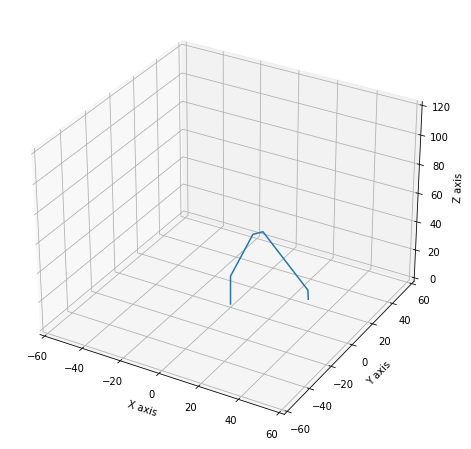

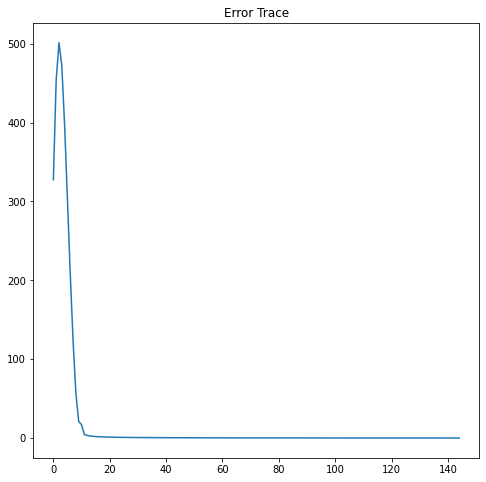

In [289]:
joints = np.array([[0.0],[-pi/2],[0.0],[pi/2],[0.0],[0.0]])

target = np.array([[1, 0, 0, 40],
                   [0, -1, 0, 0],
                   [0, 0, -1, 20],
                   [0, 0, 0, 1]])

new_j, e_trace = i_kine(joints, target, error_trace=True)

plot_pose(new_j)

plt.figure(figsize=(8,8))
plt.plot(e_trace)
plt.title('Error Trace')